### 지도학습 - 회귀모델 학습 추가 문제
    1. 데이터 전처리 3번 문제 : Diamonds Dataset을 이용한 가격 예측 모델 구현
    2. 데이터 전처리 5번 문제 : Red Wine Quality Dataset을 이용한 와인 품질 예측 모델 구현
> 여기서는 Dianmods Dataset의 예측 모델만 구현

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- 3번 문제 : Dianmods Dataset을 이용한 가격 예측 모델

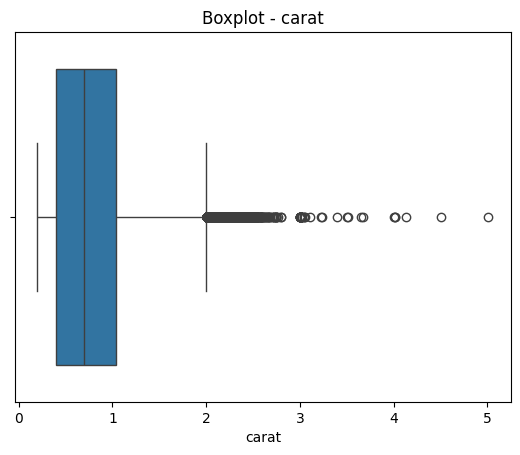

이상치 제거 하기 전 shape (53940, 11)
이상치를 제거한 뒤 데이터셋


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# 3. 이상치 제거

# diamonds.csv 데이터셋 불러오기
df = pd.read_csv('diamonds.csv')

# 이상치 확인을 위해 박스 플롯을 이용
sns.boxplot(x=df['carat'])
plt.title('Boxplot - carat')
plt.show()

print('이상치 제거 하기 전 shape',df.shape)   # 이상치 제거 하기 전 개수를 확인하기 위한 출력
# IQR 계산 
Q1 = df['carat'].quantile(0.25) # 25% 분위수
Q3 = df['carat'].quantile(0.75) # 75% 분위수
IQR = Q3 - Q1

# 이상치 경계 계산
lower_ = Q1 - 1.5 * IQR
upper_ = Q3 + 1.5 * IQR

# carat 열에서 IQR 방식을 사용하여 이상치를 제거.
# 이상치는 Q1 - 1.5 * IQR 보다 작거나, Q3 + 1.5 * IQR 보다 큰 경우로 정의.
df_1 = df[(df['carat'] >= lower_) & (df['carat'] <= upper_)]


# 이상치를 제거한 후 데이터의 개수를 출력.
print('이상치를 제거한 뒤 데이터셋')

df_1.head()

In [3]:
df_1 = df_1.drop(columns=['Unnamed: 0']) # 필요없는 열 제거

df_1.isnull().sum() # 결측치 확인.

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
# 범주형 데이터들을 인코딩

# cut, color, clarity -> 원핫인코딩
from sklearn.preprocessing import OneHotEncoder

df_encoded_1 = df_1.copy()

onehot = OneHotEncoder(sparse_output=False)

# ----------- cut 인코딩 -----------
cut_encoded = onehot.fit_transform(df_encoded_1[['cut']])
cut_cols = onehot.get_feature_names_out(['cut'])
cut_df = pd.DataFrame(cut_encoded, columns=cut_cols, index=df_encoded_1.index)
df_encoded_1 = pd.concat([df_encoded_1.drop(columns=['cut']), cut_df], axis=1)

# ----------- color 인코딩 -----------
color_encoded = onehot.fit_transform(df_encoded_1[['color']])
color_cols = onehot.get_feature_names_out(['color'])
color_df = pd.DataFrame(color_encoded, columns=color_cols, index=df_encoded_1.index)
df_encoded_1 = pd.concat([df_encoded_1.drop(columns=['color']), color_df], axis=1)

# ----------- clarity 인코딩 -----------
clarity_encoded = onehot.fit_transform(df_encoded_1[['clarity']])
clarity_cols = onehot.get_feature_names_out(['clarity'])
clarity_df = pd.DataFrame(clarity_encoded, columns=clarity_cols, index=df_encoded_1.index)
df_encoded_1 = pd.concat([df_encoded_1.drop(columns=['clarity']), clarity_df], axis=1)

df_encoded_1.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
# features 와 target 분리
# price 가 타겟, 그 외는 x

X = df_encoded_1.drop(columns=['price'])
y = df_encoded_1['price']

print(X)

       carat  depth  table     x     y     z  cut_Fair  cut_Good  cut_Ideal  \
0       0.23   61.5   55.0  3.95  3.98  2.43       0.0       0.0        1.0   
1       0.21   59.8   61.0  3.89  3.84  2.31       0.0       0.0        0.0   
2       0.23   56.9   65.0  4.05  4.07  2.31       0.0       1.0        0.0   
3       0.29   62.4   58.0  4.20  4.23  2.63       0.0       0.0        0.0   
4       0.31   63.3   58.0  4.34  4.35  2.75       0.0       1.0        0.0   
...      ...    ...    ...   ...   ...   ...       ...       ...        ...   
53935   0.72   60.8   57.0  5.75  5.76  3.50       0.0       0.0        1.0   
53936   0.72   63.1   55.0  5.69  5.75  3.61       0.0       1.0        0.0   
53937   0.70   62.8   60.0  5.66  5.68  3.56       0.0       0.0        0.0   
53938   0.86   61.0   58.0  6.15  6.12  3.74       0.0       0.0        0.0   
53939   0.75   62.2   55.0  5.83  5.87  3.64       0.0       0.0        1.0   

       cut_Premium  ...  color_I  color_J  clarity_

In [6]:
# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state=42
)

In [7]:
# 여러 회귀 모델을 이용한 학습 및 예측
from sklearn.linear_model import LinearRegression

# 모델 생성 및 학습
linear= LinearRegression()
linear.fit(X_train, y_train)

# 예측 수행
y_pred = linear.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('mse : ',mse)
print('r2: ',r2)
# r2 의 값이 0.91? 매우 타당하다. -> 성능이 준수


mse :  1020639.3053919675
r2:  0.9112156970956644


c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


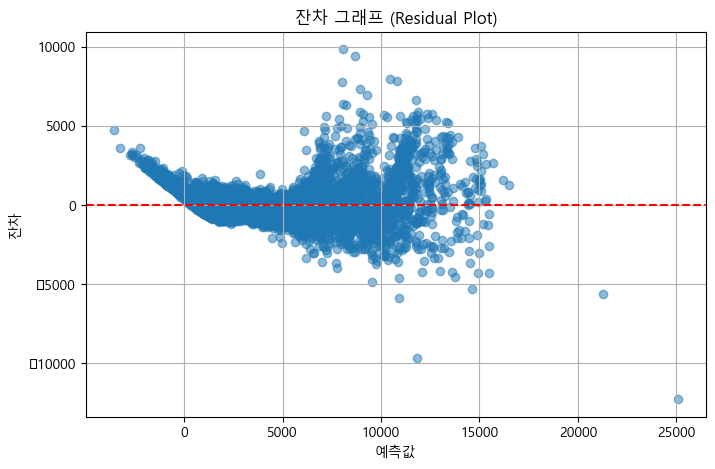

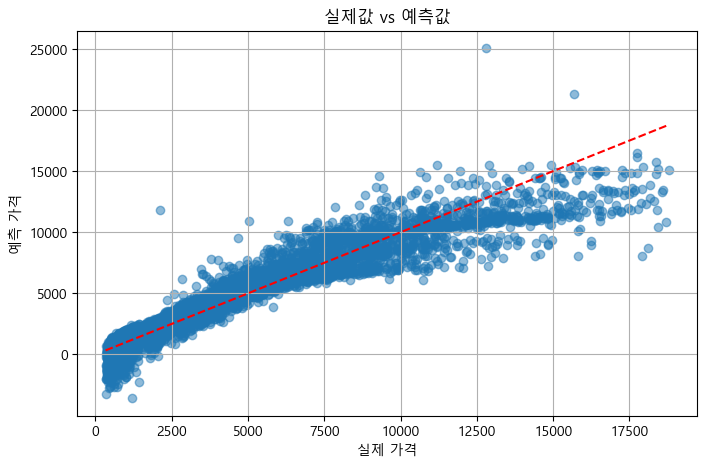

In [9]:
## **feature 가 독립 변수가 아니라 다변량이라면 x-y 형태로 시각화가 어렵다.**
## 잔차 그래프, 실제값 vs 예측값 산점도 등을 통해 시각화

# 여기선 잔차 그래프!
# 예측값과 실제값의 차이(잔차)를 시각화하는 방법
# 예측값이 정확하다면 잔차는 0 근처에 랜덤하게 퍼져 있어야 한다
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

# 잔차 = 실제값 - 예측값
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.title("잔차 그래프 (Residual Plot)")
plt.grid(True)
plt.show()

## 실제값 vs 예측값
# 선형회귀 모델이 잘 작동한다면? 점들이 대각선에 가깝게 위치해야 한다
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("실제 가격")
plt.ylabel("예측 가격")
plt.title("실제값 vs 예측값")
plt.grid(True)
plt.show()

- 선형회귀를 사용한 결과
    - 고가 다이아몬드로 갈 수록 예측 정확도가 저하한다.
-> 비선형 회귀를 해보자!

In [10]:
## 랜덤포레스트를 이용한 회귀 모델
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 학습
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# 예측 수행
y_pred_rf = rf.predict(X_test)

In [12]:
import numpy as np

# 성능 지표 계산
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print('mse_rf: ', mse_rf)
print('r2_rf: ', r2_rf) # 선형회귀를 사용했을 때 보다 올랐다! 91->98

mse_rf:  214769.91370909254
r2_rf:  0.9813173988374246


c:\project\py_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


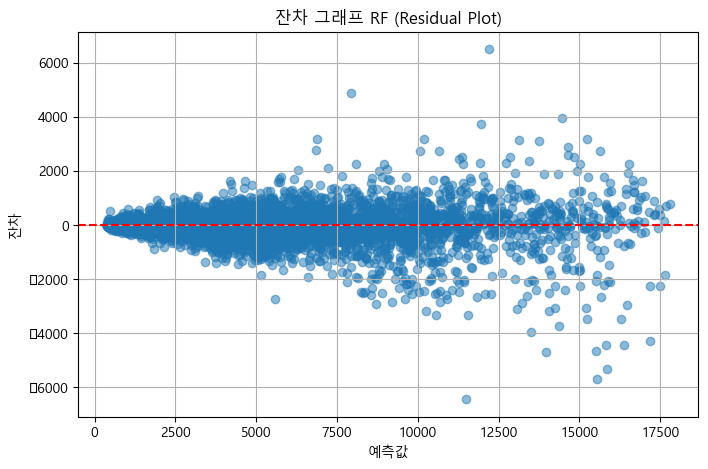

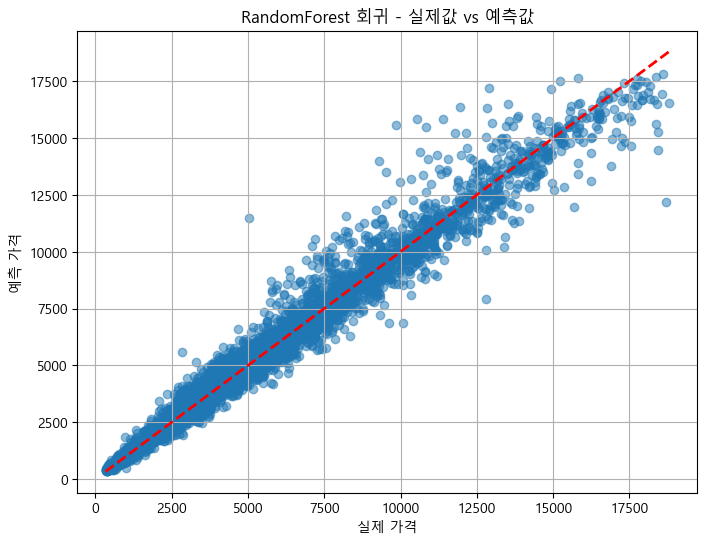

In [13]:
# 잔차 = 실제값 - 예측값
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,5))
plt.scatter(y_pred_rf, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.title("잔차 그래프 RF (Residual Plot)")
plt.grid(True)
plt.show()


# 실제값 vs 예측 값 그래프
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("실제 가격")
plt.ylabel("예측 가격")
plt.title("RandomForest 회귀 - 실제값 vs 예측값")
plt.grid(True)
plt.show()